PARKINSON MODEL

In [ ]:

from pandas import *
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import *
import pickle
import xlrd

In [31]:
parkinson_data=read_csv('D:\disease prediction\parkinsons.csv')
parkinson_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [32]:
parkinson_data.shape

(195, 24)

In [33]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [34]:
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [35]:
x=parkinson_data.drop(columns=['name','status'], axis=1)
y=parkinson_data['status']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x_train,x_test,y_train,y_test)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
13       139.173       179.139        76.556         0.00390   
142      198.458       219.290       148.691         0.00376   
174      117.004       144.466        99.923         0.00353   
113      210.141       232.706       185.258         0.00534   
88       173.898       211.350        74.677         0.00448   
..           ...           ...           ...             ...   
123      182.018       197.173        79.187         0.00842   
190      174.188       230.978        94.261         0.00459   
109      193.030       208.900        80.297         0.00766   
153      121.345       139.644        98.250         0.00684   
144      202.544       241.350       164.168         0.00254   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
13            0.00003   0.00165   0.00208     0.00496       0.01642   
142           0.00002   0.00182   0.00215     0.00546       0.03527   
174           0.00

In [37]:
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuraccy of model on train data set:%.2f'%training_data_accuracy)

accuraccy of model on train data set:0.87


In [39]:
x_test_prediction=model.predict(x_test)
training_score=accuracy_score(x_test_prediction,y_test)
print('accuracy of model on test data set:%.2f'%training_score)

accuracy of model on test data set:0.85


In [40]:
file_name='D:\disease prediction\parkinson.sav'
pickle.dump(model,open(file_name,'wb'))

In [41]:
model=pickle.load(open(file_name,'rb'))

In [42]:
print(model)

SVC(kernel='linear')


HEART MODEL

In [43]:
from pandas import *
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import *
import pickle

In [44]:
heart_data=read_csv('D:\disease prediction\heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [45]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
heart_data.shape

(303, 14)

In [47]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [49]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [50]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

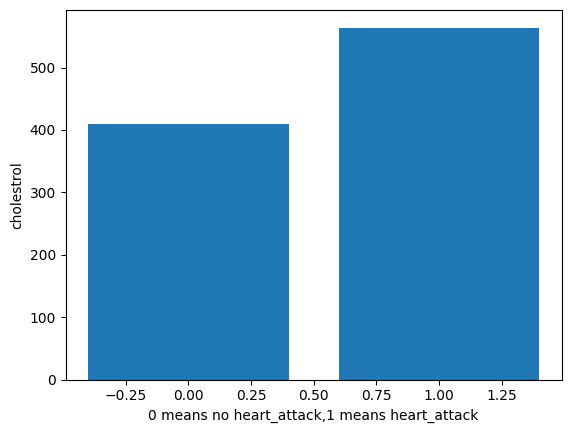

In [52]:
bar(heart_data['target'],heart_data['chol'])
xlabel('0 means no heart_attack,1 means heart_attack')
ylabel('cholestrol')
show()

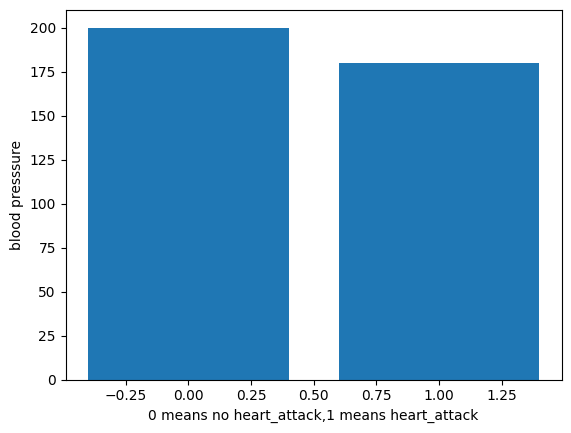

In [53]:
bar(heart_data['target'],heart_data['trestbps'])
xlabel('0 means no heart_attack,1 means heart_attack')
ylabel('blood presssure')
show()

In [54]:
x=heart_data.drop(columns='target',axis=1)
print(x.head())
y=heart_data['target']
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


spliiting data into train and test

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x_train,x_test,y_train,y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
61    54    1   1       108   309    0        1      156      0      0.0   
238   77    1   0       125   304    0        0      162      1      0.0   
160   56    1   1       120   240    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
289   55    0   0       128   205    0        2      130      1      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
100   42    1   3       148   244    0        0      178      0      0.8   
49    53    0   0       138   234    0        0      160      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
194   60    1   2       140   185    0        0      155      0      3.0   
131   49    0   1       134   271    0        1      162      0      0.0   

     slope  ca  thal  
61       2   0     3  
238      2   3     2  
160      0   0    

In [56]:
model=svm.SVC(kernel='linear')

In [57]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [58]:
x_test_prediction=model.predict(x_test)
training_score=accuracy_score(x_test_prediction,y_test)
print('accuracy of model on test data set:%.2f'%training_score)

accuracy of model on test data set:0.82


In [59]:
training_score=accuracy_score(x_test_prediction,y_test)
print('accuracy of model on test data set:%.2f'%training_score)

accuracy of model on test data set:0.82


In [60]:
list=[62,0,0,140,268,0,0,160,0,3.6,0,2,2]
input_data_as_numpy=array(list).reshape(1,-1)
prediction=model.predict(input_data_as_numpy)
if prediction==1:
    print('person may suffer with heart attack')
else:
    print('person is not suffering from heart attack')

person is not suffering from heart attack


In [61]:
file_name='D:\disease prediction\heart.sav'
pickle.dump(model,open(file_name,'wb'))

In [62]:
a=pickle.load(open(file_name,'rb'))
print(a)
print(a.predict(input_data_as_numpy))

SVC(kernel='linear')
[0]


DIABETEES MODEL 

In [63]:
from numpy import *
from pandas import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from matplotlib.pyplot import *
warnings.filterwarnings('ignore')

In [64]:
diabetes_data=read_csv('D:\disease prediction\diabetes.csv')

In [65]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
diabetes_data.shape

(768, 9)

In [68]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

graphs of the data who dont have diabetes

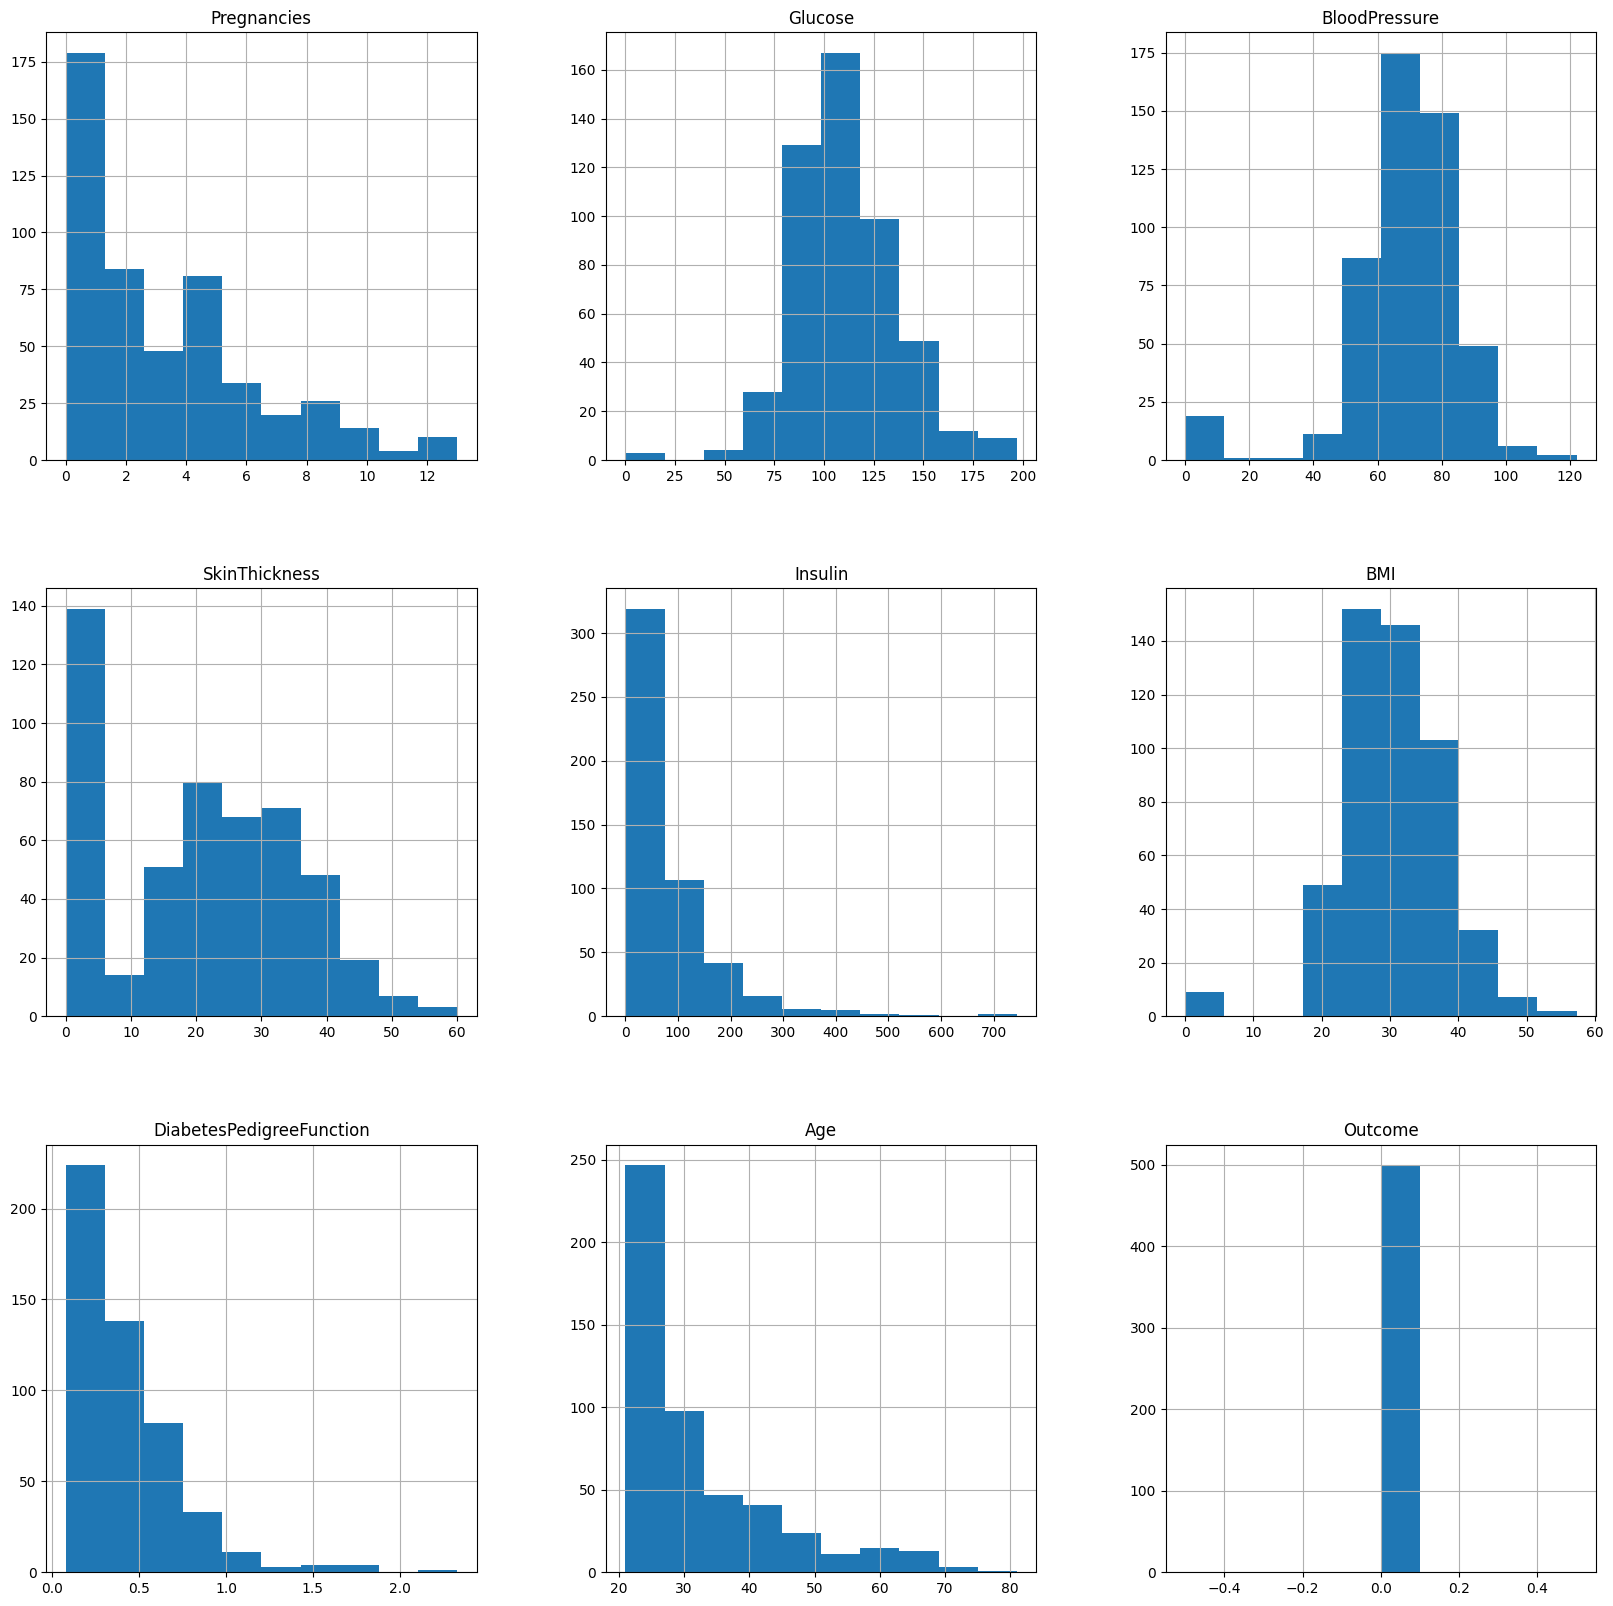

In [69]:
p=diabetes_data[diabetes_data['Outcome']==0].hist(figsize=(20,20))

graphs of the data who has diabetes

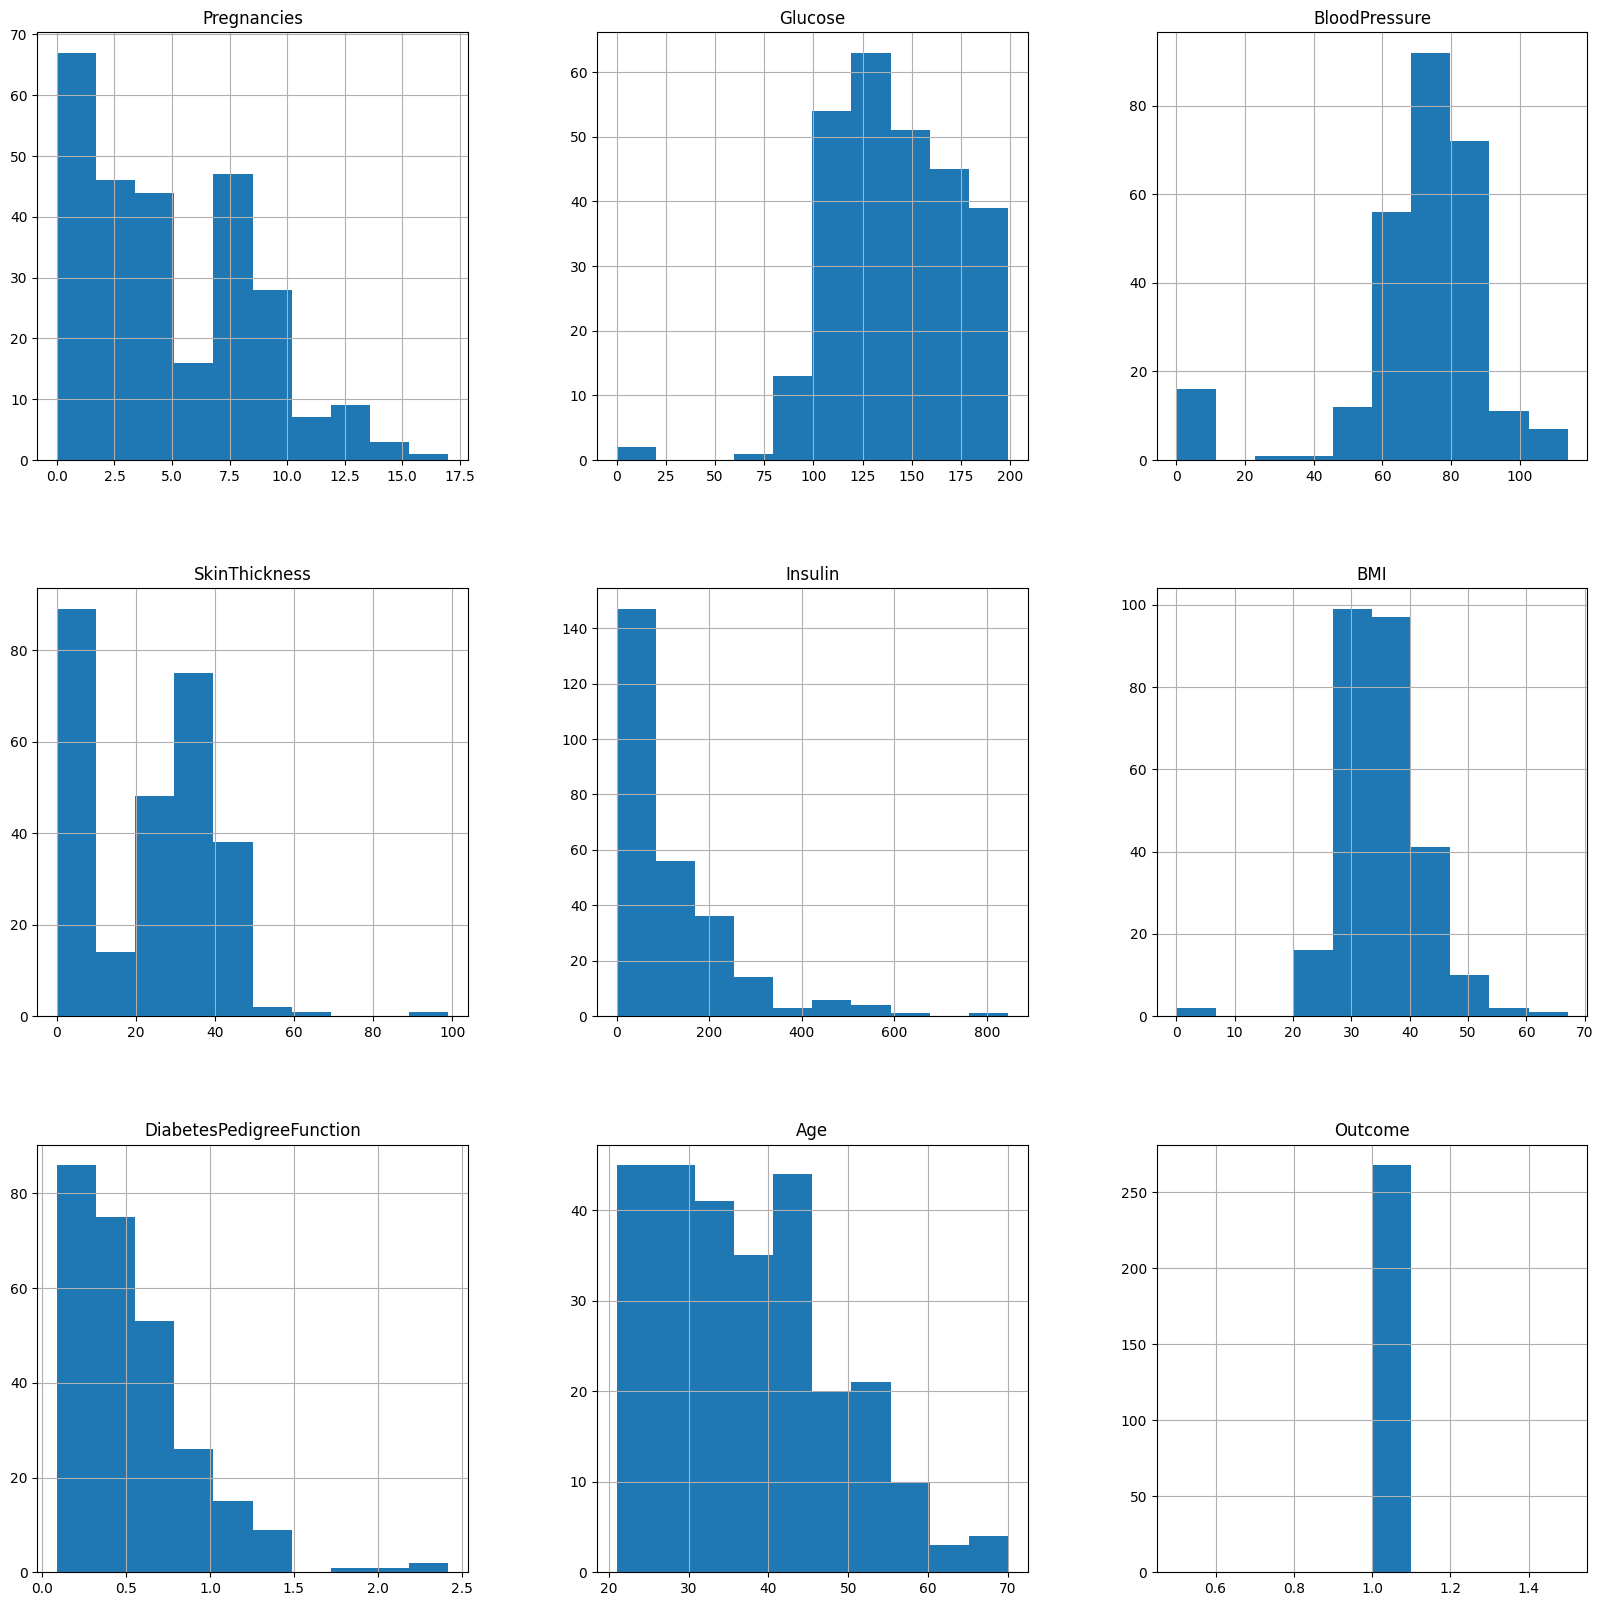

In [70]:
p=diabetes_data[diabetes_data['Outcome']==1].hist(figsize=(20,20))

In [71]:
x=diabetes_data.drop(columns='Outcome',axis=1)
y=diabetes_data['Outcome']

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=45)

In [73]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [74]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('training data accuraacy%.2f'%training_data_accuracy)

training data accuraacy0.78


In [75]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('test data accuracy%.2f'%test_data_accuracy)

test data accuracy0.79


In [76]:
input_data_str=[5,166,72,19,175,25.8,0.587,51]
input_data=array(input_data_str,dtype=float).reshape(1,-1)
prediction=model.predict(input_data)
print(prediction)
if prediction==0:
    print('person dont have diabetes')
else:
    print('person has diabetes')


[1]
person has diabetes


In [77]:
import pickle
filename='D:\disease prediction\diabetes.sav'
pickle.dump(model,open(filename,'wb'))
loaded_model=pickle.load(open('D:\disease prediction\diabetes.sav','rb'))